In [6]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import missingno as msno

In [3]:
df_hits = pd.read_csv('ga_hits.csv')
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [3]:
df_hits.shape

(15726470, 11)

In [3]:
df_session = pd.read_csv('ga_sessions.csv', low_memory=False)
df_session.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [5]:
df_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [5]:
df_session.shape

(1860042, 18)

## Data Preparation

<Axes: >

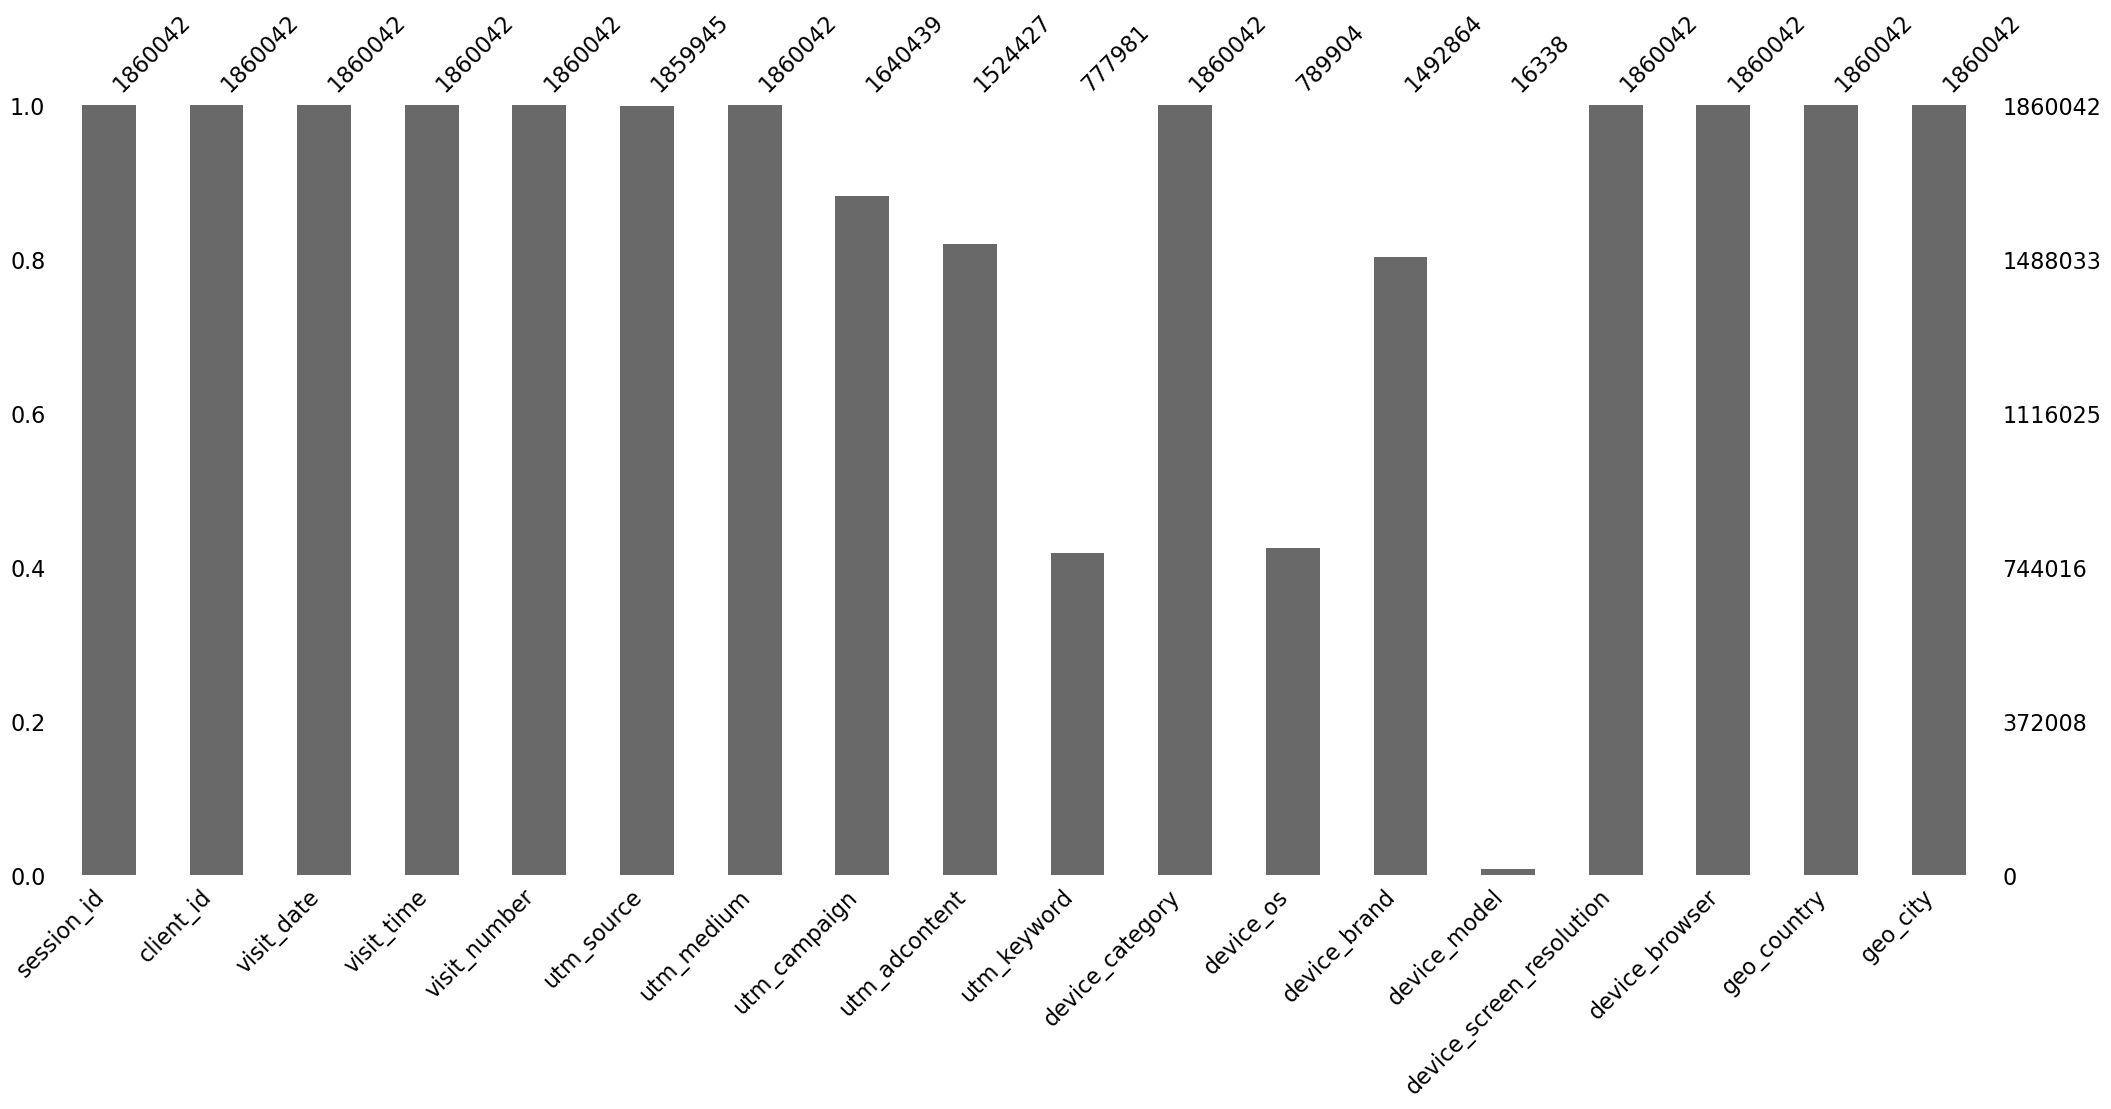

In [4]:
# проверка пропусков
msno.bar(df_session)

In [5]:
# Процент пропущенных значений в ga_sessions
missing_values = ((df_session.isna().sum() / len(df_session)) * 100).sort_values()
print('количество пропущенных значений:')
missing_values

количество пропущенных значений:


session_id                   0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_category              0.000000
geo_country                  0.000000
utm_medium                   0.000000
geo_city                     0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
client_id                    0.000000
utm_source                   0.005215
utm_campaign                11.806346
utm_adcontent               18.043410
device_brand                19.740307
device_os                   57.533002
utm_keyword                 58.174009
device_model                99.121633
dtype: float64

In [4]:
def print_missed_info(df):
    print('количество полностью заполненых объектов из всей выборки:', len(df.dropna()))
    print('процент полностью заполненых объектов из всей выборки:', round(len(df.dropna()) / len(df) * 100, 2))

In [5]:
print_missed_info(df_session)

количество полностью заполненых объектов из всей выборки: 14940
процент полностью заполненых объектов из всей выборки: 0.8


In [5]:
# заполнение столбца device_brand
# проверка названия бренда в зависимости от device_os == Windows
df_session.device_brand[df_session.device_os == 'Windows'].unique()

array([nan], dtype=object)

In [6]:
# проверка названия бренда в зависимости от device_os == Linux
df_session.device_brand[df_session.device_os == 'Linux'].unique()

array([nan], dtype=object)

In [7]:
# проверка названия бренда в зависимости от device_os == Macintosh
df_session.device_brand[df_session.device_os == 'Macintosh'].unique()

array([nan], dtype=object)

In [8]:
# проверка названия бренда в зависимости от device_os == Chrome OS
df_session.device_brand[df_session.device_os == 'Chrome OS'].unique()

array([nan], dtype=object)

In [8]:
df_session.device_brand[df_session.device_os == 'iOS'].value_counts()

device_brand
Apple        207098
(not set)         6
Name: count, dtype: int64

In [9]:
# созданиние нового датасета (копия df_session) для отчистки данных
df_session_clean = df_session.copy()

In [10]:
device_pc = ['Windows', 'Linux', 'Chrome OS']

In [11]:
# добавление устройства pc для устройтсв с операционной системой windows, Chrome OS и Linux
df_session_clean['device_brand'] = df_session_clean.apply(lambda x: 'PC' if x.device_os in device_pc else x.device_brand, axis=1)

In [12]:
# добавление устройства Apple для устройтсв с операционной системой Macintosh
df_session_clean['device_brand'] = df_session_clean.apply(lambda x: 'Apple' if x.device_os == 'Macintosh' else x.device_brand, axis=1)

In [13]:
# заполнение пропусков в device_brand на самое популярное Apple
df_session_clean.device_brand = df_session_clean.device_brand.fillna('Apple')

In [14]:
df_session_clean.device_brand.describe()

count     1860042
unique        206
top         Apple
freq       824756
Name: device_brand, dtype: object

<Axes: >

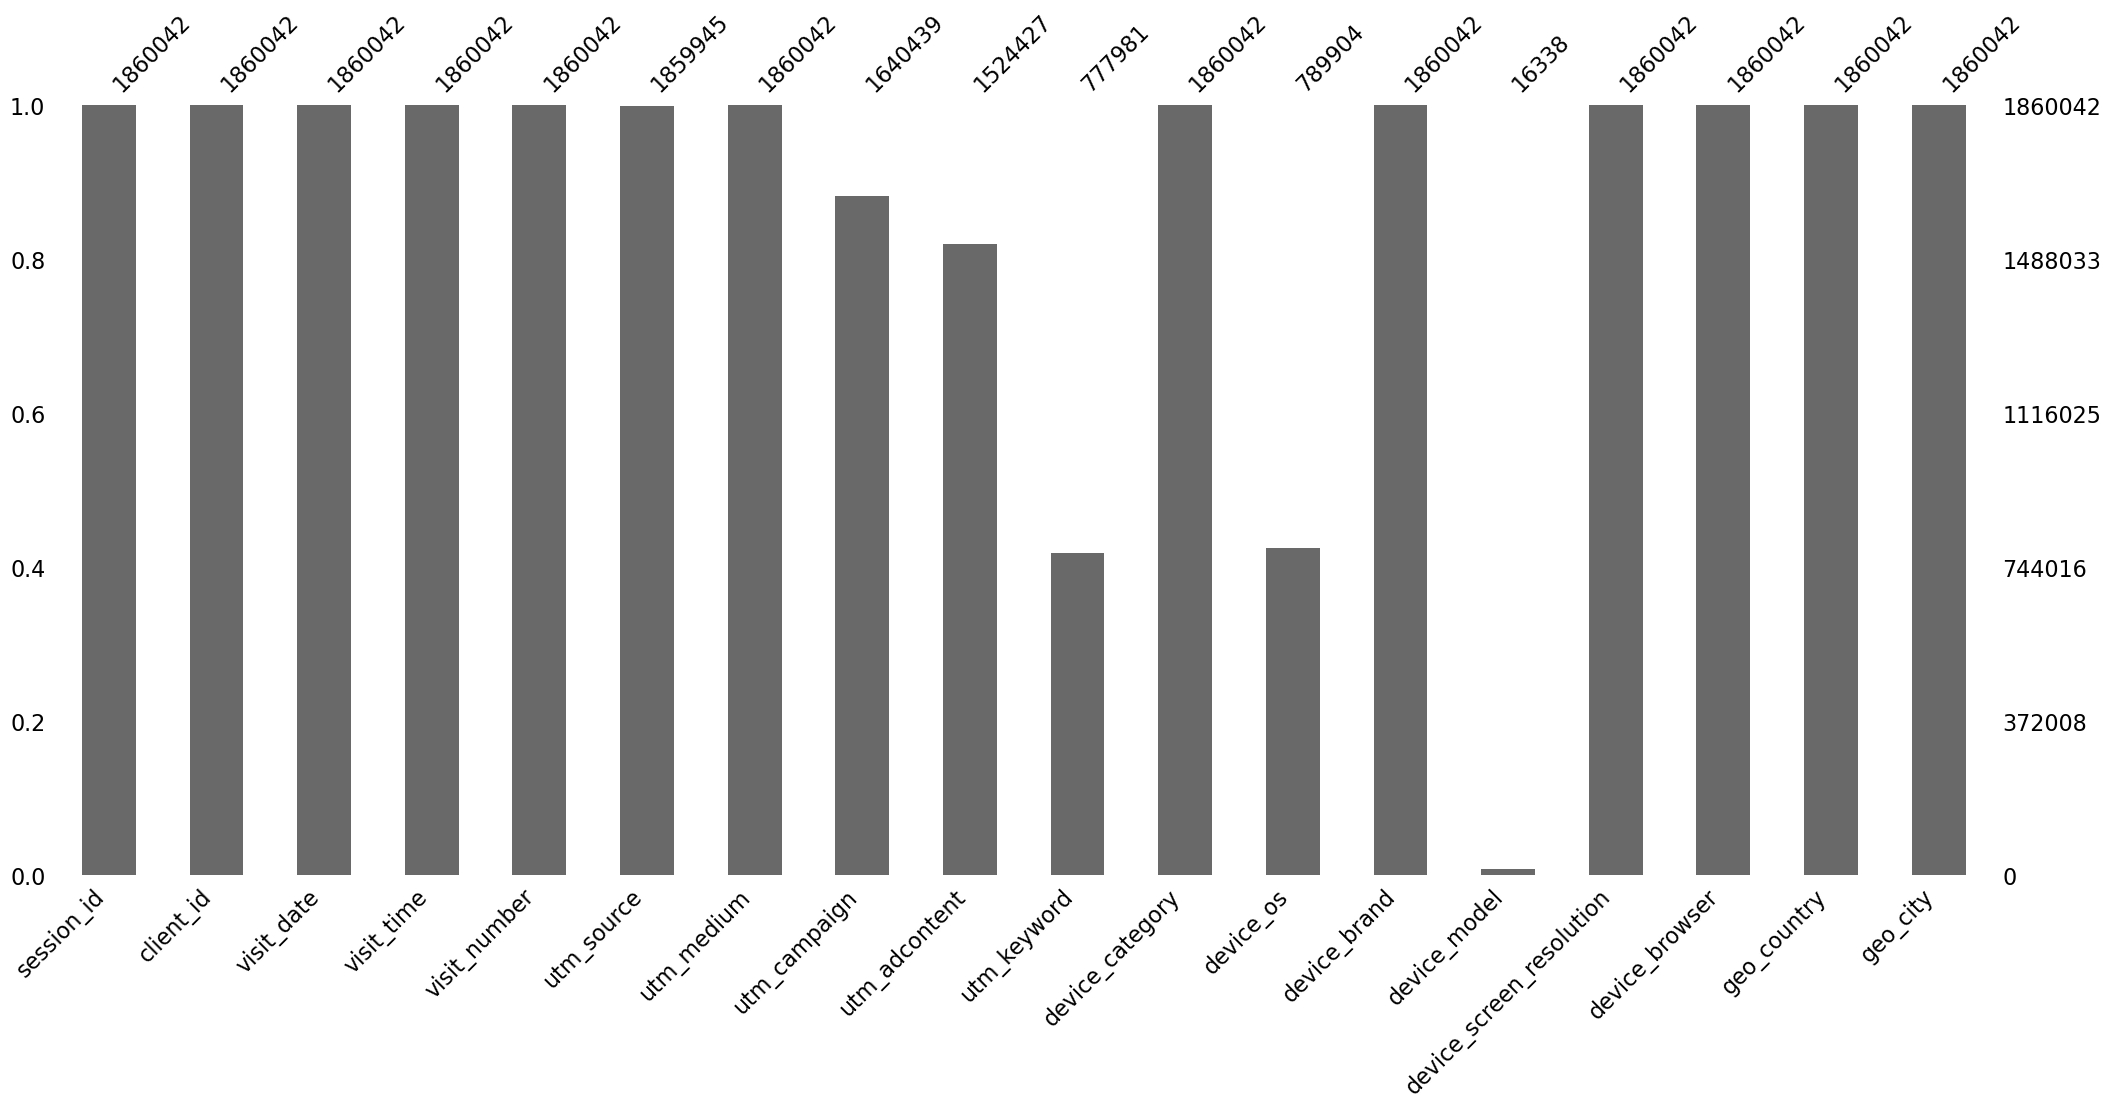

In [15]:
msno.bar(df_session_clean)

In [17]:
# Процент пропущенных значений в ga_sessions_clean
missing_values = ((df_session_clean.isna().sum() / len(df_session_clean)) * 100).sort_values()
print('количество пропущенных значенний:')
missing_values

количество пропущенных значенний:


session_id                   0.000000
device_browser               0.000000
device_screen_resolution     0.000000
device_brand                 0.000000
device_category              0.000000
geo_country                  0.000000
geo_city                     0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
client_id                    0.000000
utm_medium                   0.000000
utm_source                   0.005215
utm_campaign                11.806346
utm_adcontent               18.043410
device_os                   57.533002
utm_keyword                 58.174009
device_model                99.121633
dtype: float64

<Axes: >

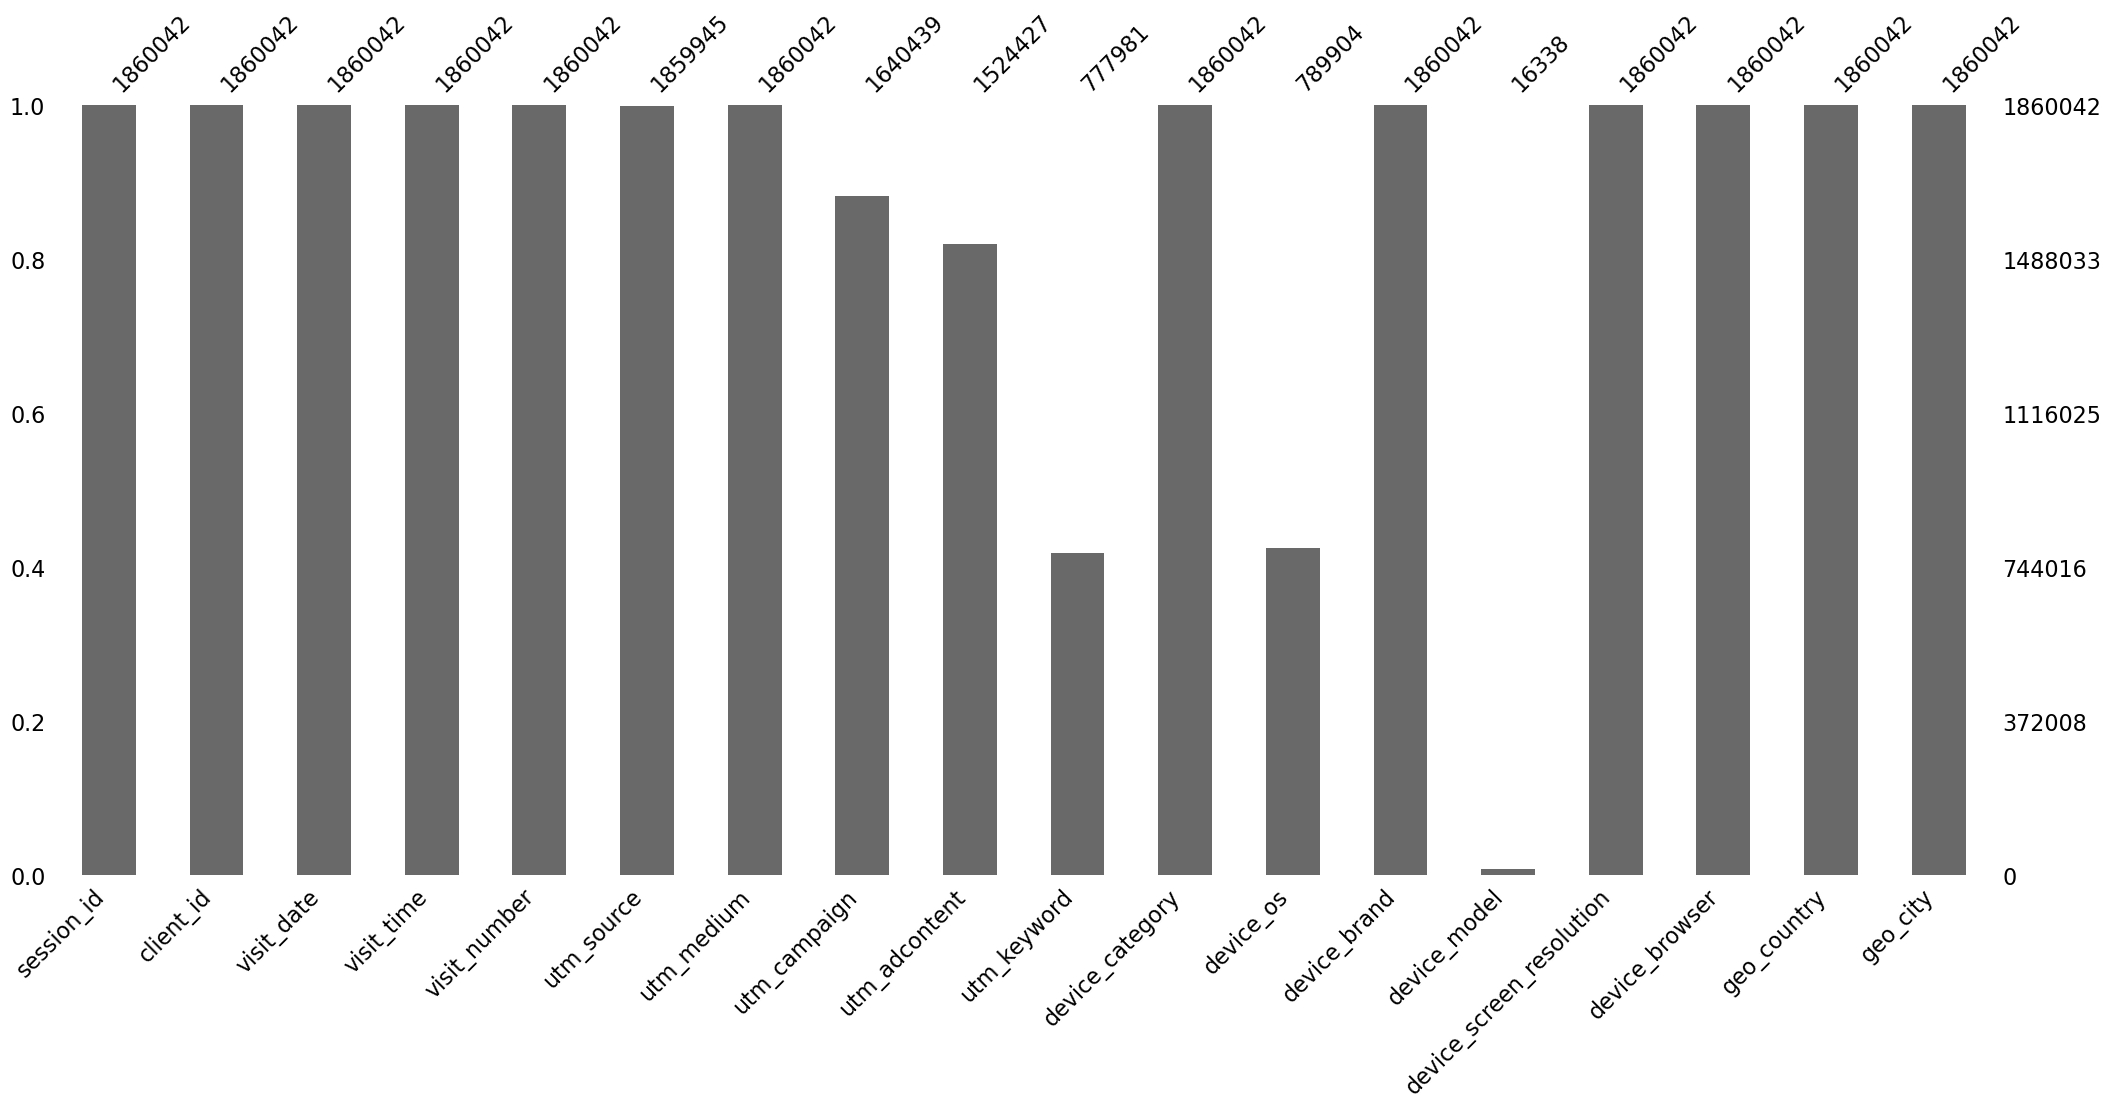

In [17]:
msno.bar(df_session_clean)

In [14]:
df_session_clean = df_session_clean.drop(columns=['device_model', 'utm_keyword', 'device_os'])

In [19]:
# заполнение пропущенных значений в столбцах utm_campaign и utm_adcontent
df_session_clean.utm_campaign.describe()

count                  1640439
unique                     412
top       LTuZkdKfxRGVceoWkVyg
freq                    463481
Name: utm_campaign, dtype: object

In [20]:
df_session_clean.utm_adcontent.describe()

count                  1524427
unique                     286
top       JNHcPlZPxEMWDnRiyoBf
freq                   1006599
Name: utm_adcontent, dtype: object

In [21]:
df_session_clean.utm_source.describe()

count                  1859945
unique                     293
top       ZpYIoDJMcFzVoPFsHGJL
freq                    578290
Name: utm_source, dtype: object

In [15]:
df_session_clean.utm_campaign = df_session_clean.utm_campaign.fillna('LTuZkdKfxRGVceoWkVyg')

In [16]:
df_session_clean.utm_adcontent = df_session_clean.utm_adcontent.fillna('JNHcPlZPxEMWDnRiyoBf')

In [17]:
df_session_clean.utm_source = df_session_clean.utm_source.fillna('ZpYIoDJMcFzVoPFsHGJL')

<Axes: >

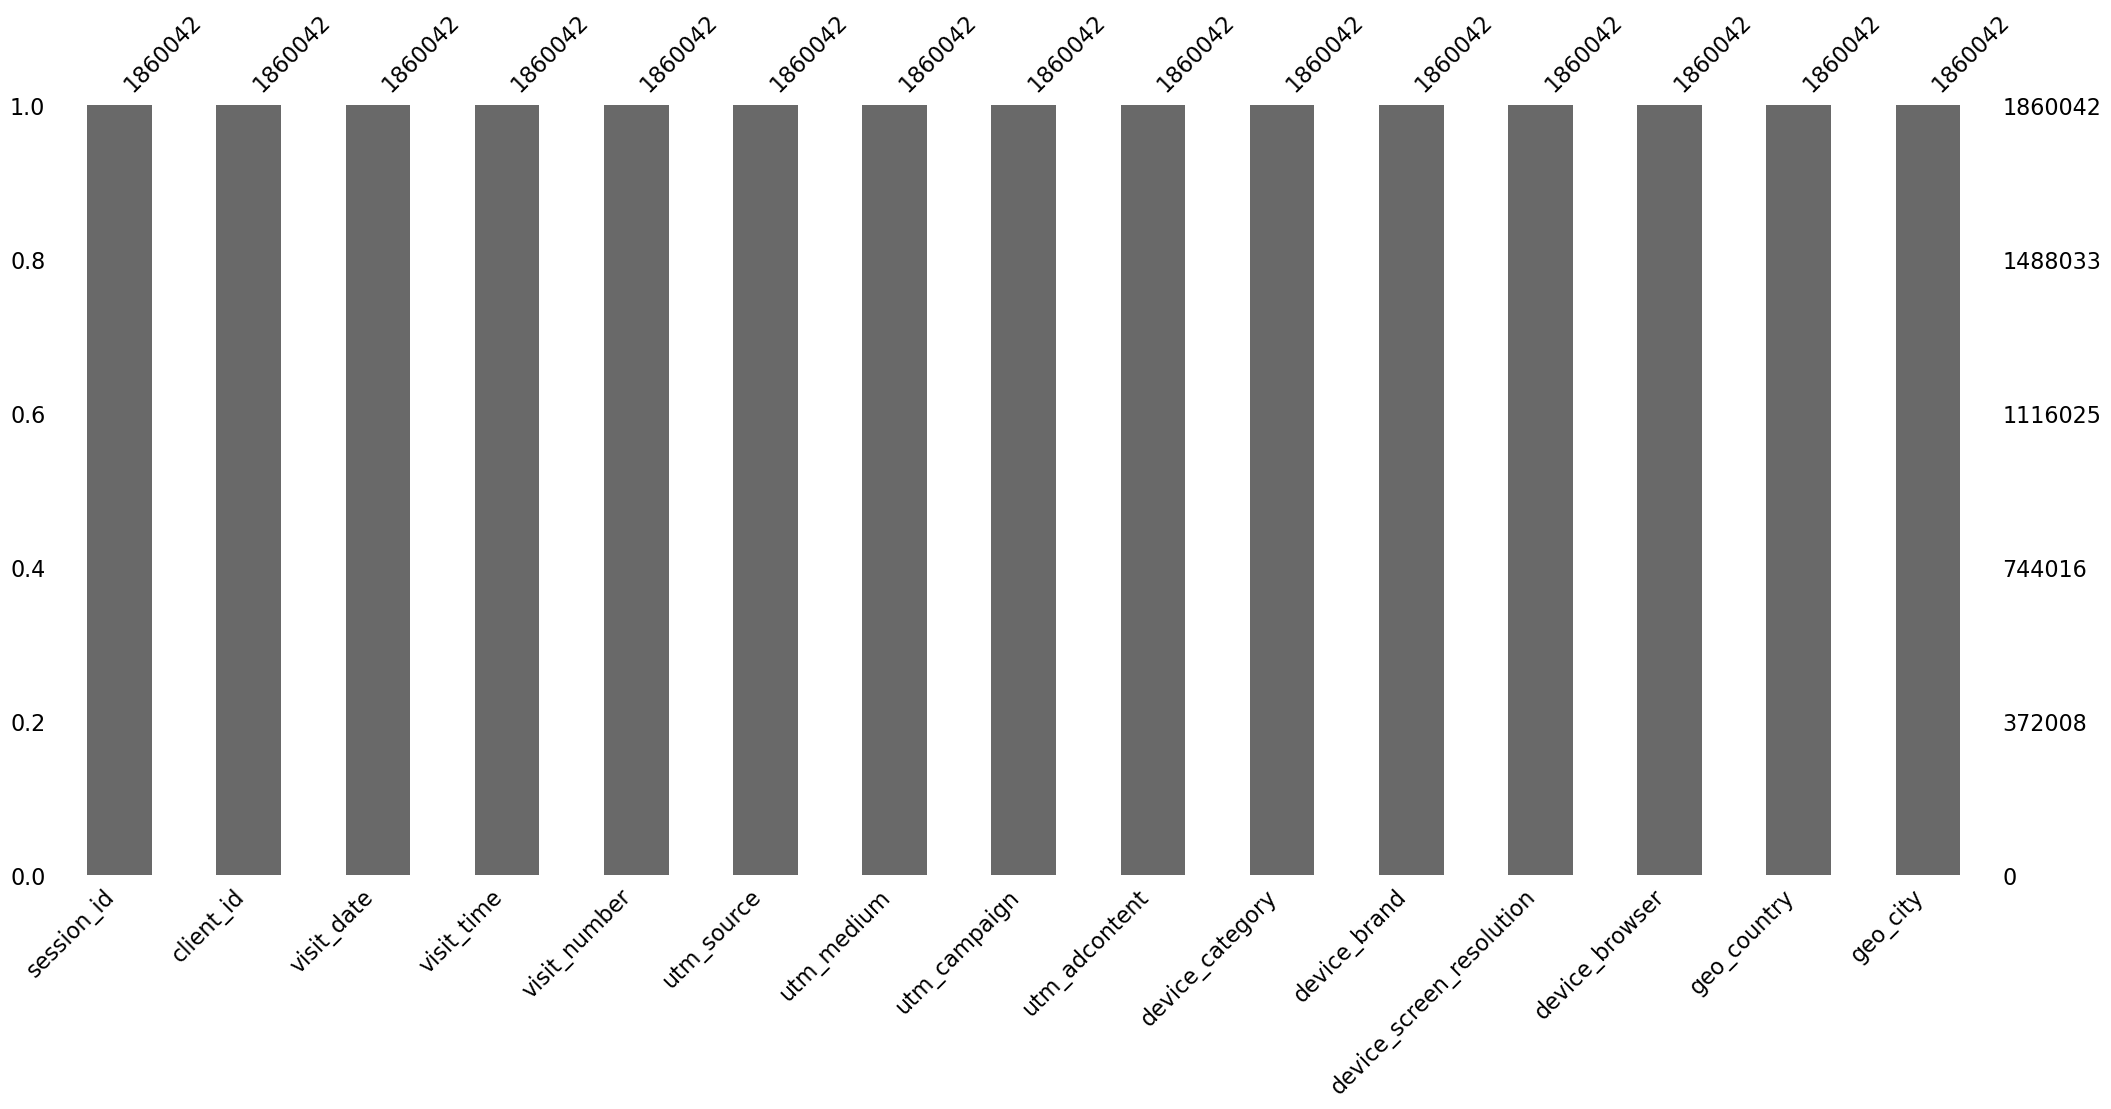

In [18]:
msno.bar(df_session_clean)

In [19]:
missing_values = ((df_session_clean.isna().sum() / len(df_session_clean)) * 100).sort_values()
print('количество пропущенных значенний:')
missing_values

количество пропущенных значенний:


session_id                  0.0
client_id                   0.0
visit_date                  0.0
visit_time                  0.0
visit_number                0.0
utm_source                  0.0
utm_medium                  0.0
utm_campaign                0.0
utm_adcontent               0.0
device_category             0.0
device_brand                0.0
device_screen_resolution    0.0
device_browser              0.0
geo_country                 0.0
geo_city                    0.0
dtype: float64

## Feature Engineering

In [27]:
# проверка дублей ga_hits
df_hits.duplicated().value_counts()

False    15726470
Name: count, dtype: int64

In [29]:
# проверка дублей ga_hits по session_id
df_hits[df_hits.session_id.duplicated()]

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
23,3117547552978670057.1640217454.1640217454,2021-12-23,1032.0,5,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,card_web,view_card,NaN,NaN
32,3282323002617677961.1640266499.1640266499,2021-12-23,677.0,7,event,NaN,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,card_web,view_card,NaN,NaN
39,562366956183957396.1640246520.1640246520,2021-12-23,724.0,7,event,NaN,sberauto.com/cars/all/mini/hatch/b82590a3?rent...,card_web,view_card,NaN,NaN
42,628849304731384746.1640233987.1640233987,2021-12-23,1090.0,5,event,trXmoxcphNjuYcShOXwL,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,card_web,view_card,NaN,NaN
61,2530706414478031710.1640233887.1640233887,2021-12-23,1690.0,5,event,trXmoxcphNjuYcShOXwL,sberauto.com/cars/all/nissan/qashqai/bfc21661?...,card_web,view_card,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15726465,6866159858916559617.1640270865.1640270865,2021-12-23,810589.0,43,event,NaN,sberauto.com/cars/all/toyota/fortuner/24cb5af2...,quiz,quiz_show,NaN,NaN
15726466,7310304587364460692.1640261783.1640261783,2021-12-23,904927.0,40,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,quiz,quiz_show,NaN,NaN
15726467,8013702685784312179.1640270195.1640270195,2021-12-23,2172865.0,43,event,NaN,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,quiz,quiz_show,NaN,NaN
15726468,8021505554734405918.1640257821.1640257821,2021-12-23,713325.0,45,event,NaN,sberauto.com/cars/all/bmw/x3/6a660f0a?rental_p...,quiz,quiz_show,NaN,NaN


In [33]:
df_hits.session_id.duplicated().value_counts()

session_id
True     13991860
False     1734610
Name: count, dtype: int64

In [34]:
# проверка дублей ga_sessions
df_session.duplicated().value_counts()

False    1860042
Name: count, dtype: int64

In [35]:
# проверка дублей ga_sessions по session_id
df_session[df_session.session_id.duplicated()]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city


In [36]:
df_session.session_id.duplicated().value_counts()

session_id
False    1860042
Name: count, dtype: int64

In [1]:
# дубликаты есть только в ga_hits по session_id. Это значит, что одному и томуже человеку, обращались несколько раз 
# и результат обращения зачастаю был разный.

In [18]:
# создание спимка с целевыми действиямия target_list
target_list = ['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']

In [19]:
# создание копии df_hits для препорирования
df_hits_prep = df_hits.copy()

In [20]:
# создание нового признака (цеоевая переменная) target_param, принимает занчение 1 или 0 в df_hits. Если значение 1 
# то целевое действие имело место быть (согласно списку целевых действий из глосария) и соответственно 0 когда не было целевого 
# действия.
df_hits_prep["target_param"] = df_hits_prep.apply(lambda x: 1 if x.event_action in target_list else 0, axis=1)

In [22]:
df_hits_prep[df_hits_prep.target_param == 1]

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value,target_param
4016,2744563715298057088.1640258436.1640258436,2021-12-23,843092.0,81,event,NaN,sberauto.com/cars/all/kia/rio/fee33fe6?utm_sou...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN,1
4045,3087297479839089634.1640268774.1640268774,2021-12-23,194144.0,22,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN,1
4046,3156966333326004302.1640206419.1640206800,2021-12-23,327223.0,63,event,NaN,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN,1
4047,3750243879753098158.1640272208.1640272208,2021-12-23,156992.0,20,event,NaN,sberauto.com/cars/all/nissan/x-trail/0744675f?...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN,1
4048,7518333712042258254.1640258901.1640258901,2021-12-23,170616.0,16,event,NaN,sberauto.com/cars/all/mercedes-benz/gla-klasse...,sub_submit,sub_submit_success,KuMiABMMbspIDDhiCNVS,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
15725025,1277864870843199549.1636773954.1636773954,2021-11-13,354017.0,30,event,NaN,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,sub_button_click,sub_car_claim_submit_click,NaN,NaN,1
15725133,965861352491898977.1636751459.1636751459,2021-11-13,172590.0,18,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_submit,sub_submit_success,nsPPIRqjxBefONGPpnsF,NaN,1
15725134,4727705172767122620.1636818847.1636818847,2021-11-13,356120.0,43,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_submit,sub_submit_success,uimgZZmhfLQwbKAZZfCk,NaN,1
15725135,4727705172767122620.1636818847.1636818847,2021-11-13,312303.0,41,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,sub_button_click,sub_open_dialog_click,ZaZuwAXOKlbzyhUqtnmk,NaN,1


In [21]:
# групмровка ga_hits по session_id и удаление дубликатов по session_id. Оставить в приоретети ту запись в которой есть 
# целевое действие target_param == 1, если нет такового оставить любую запись.
grouped_session_id_hits = df_hits_prep.groupby('session_id').agg(target_column = ('target_param', 'max'))
grouped_session_id_hits

,target_column
session_id,
1000009318903347362.1632663668.1632663668,0
1000010177899156286.1635013443.1635013443,0
1000013386240115915.1635402956.1635402956,0
1000017303238376207.1623489300.1623489300,0
1000020580299877109.1624943350.1624943350,0
...,...
999960188766601545.1626816843.1626816843,0
99996598443387715.1626811203.1626811203,0
999966717128502952.1638428330.1638428330,0


In [24]:
grouped_session_id_hits[grouped_session_id_hits.target_column == 1]

,target_column
session_id,
1000136488597247974.1639897063.1639897063,1
1000389444973162418.1621946290.1621946290,1
1000512929594478414.1638534989.1638534989,1
1001214989243294231.1638179143.1638179143,1
100138766161469545.1632428137.1632428137,1
...,...
999746093241558256.1632212924.1632212924,1
999806708110929695.1628076098.1628076098,1
999819477043134339.1621901188.1621901188,1


In [26]:
df_session_clean.shape

(1860042, 15)

In [27]:
grouped_session_id_hits.shape

(1734610, 1)

In [26]:
missing_values = ((df_session_clean.isna().sum() / len(df_session_clean)) * 100).sort_values()
print('количество пропущенных значенний:')
missing_values

количество пропущенных значенний:


session_id                  0.0
client_id                   0.0
visit_date                  0.0
visit_time                  0.0
visit_number                0.0
utm_source                  0.0
utm_medium                  0.0
utm_campaign                0.0
utm_adcontent               0.0
device_category             0.0
device_brand                0.0
device_screen_resolution    0.0
device_browser              0.0
geo_country                 0.0
geo_city                    0.0
dtype: float64

In [22]:
df_count_session = pd.merge(left=df_session_clean, right=grouped_session_id_hits, on='session_id', how='inner')

In [23]:
df_count_session.target_column.isna().value_counts()

target_column
False    1732266
Name: count, dtype: int64

<Axes: >

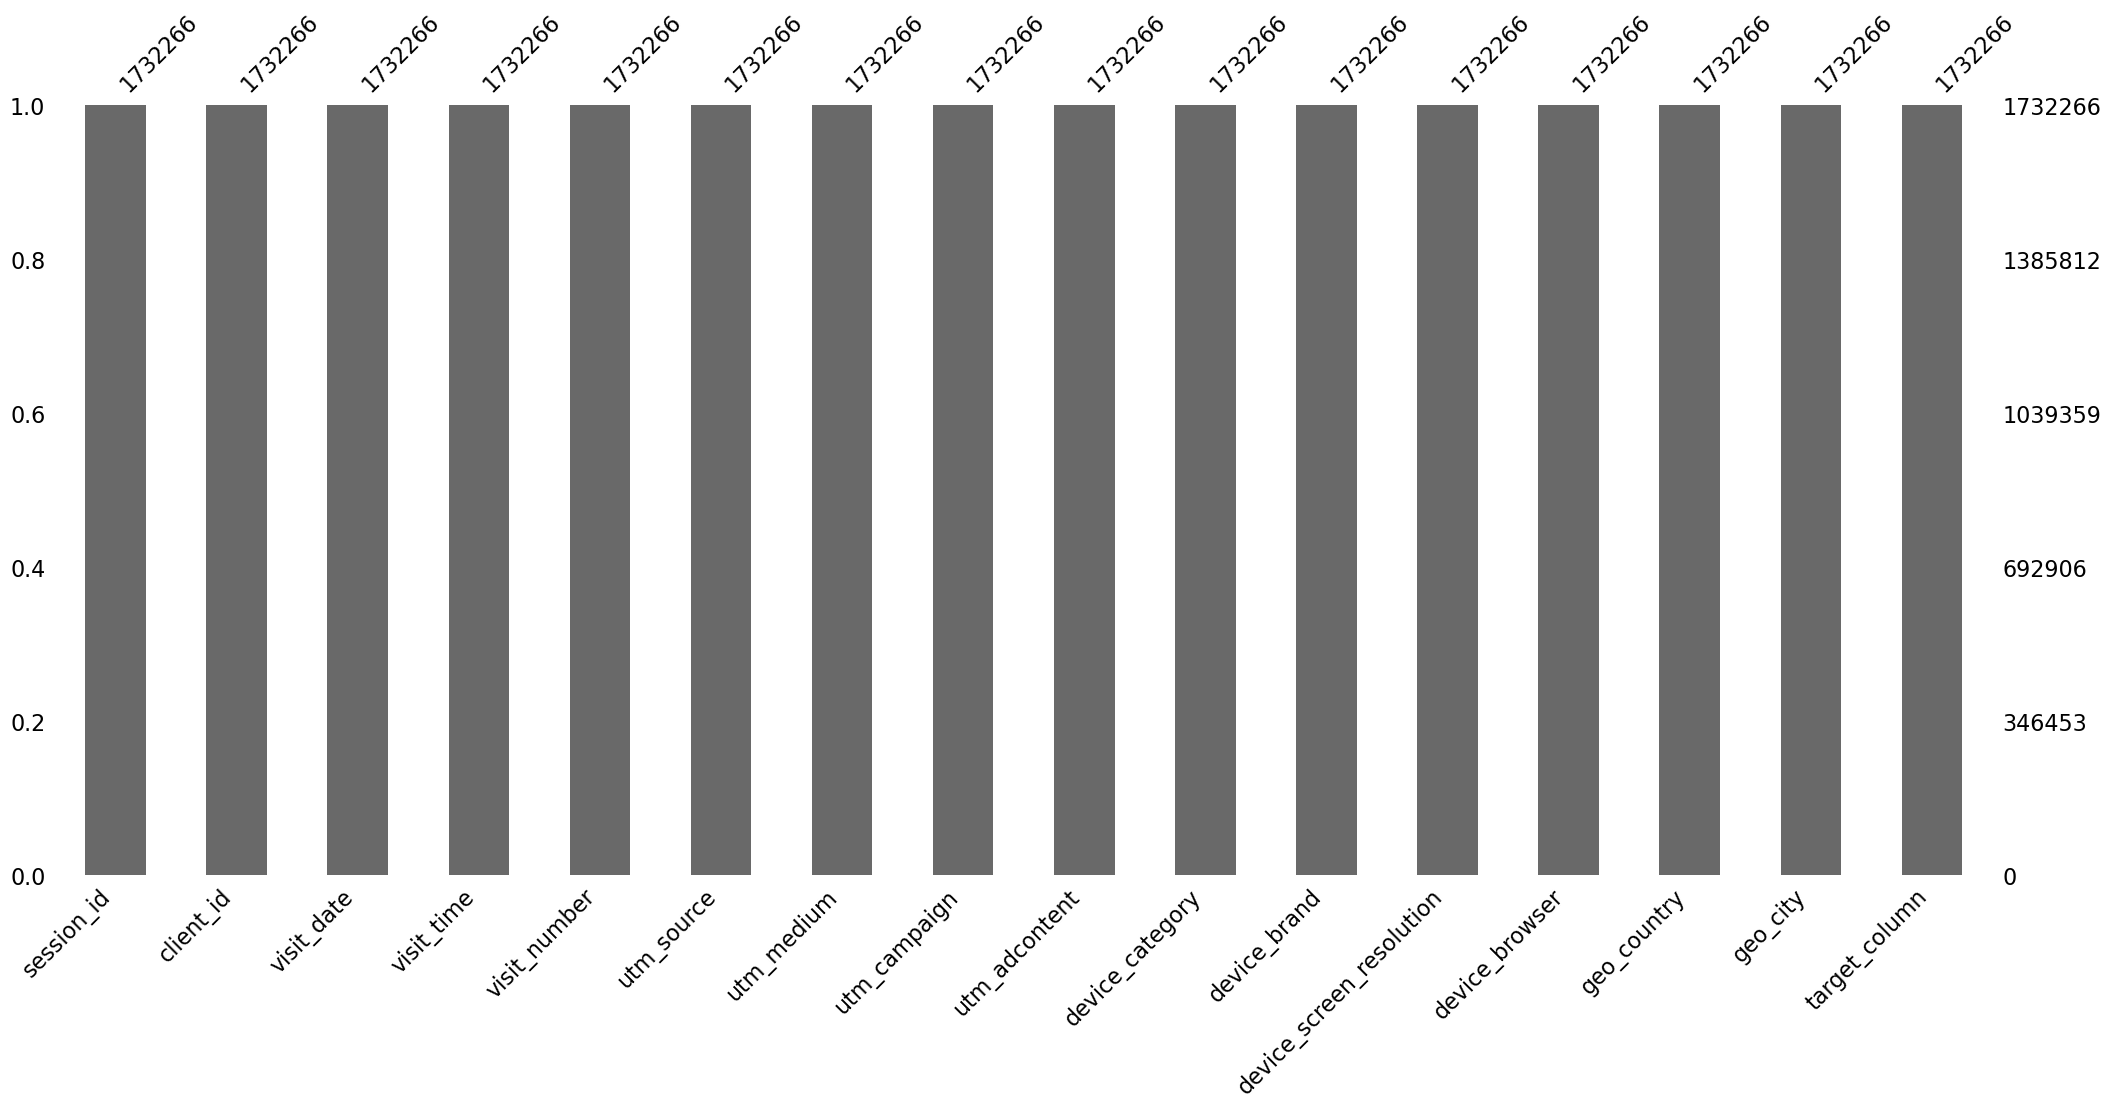

In [24]:
msno.bar(df_count_session)

In [28]:
print_missed_info(df_count_session)

NameError: name 'print_missed_info' is not defined

In [28]:
missing_values = ((df_count_session.isna().sum() / len(df_count_session)) * 100).sort_values()
print('количество пропущенных значенний:')
missing_values

количество пропущенных значенний:


session_id                  0.0
client_id                   0.0
visit_date                  0.0
visit_time                  0.0
visit_number                0.0
utm_source                  0.0
utm_medium                  0.0
utm_campaign                0.0
utm_adcontent               0.0
device_category             0.0
device_brand                0.0
device_screen_resolution    0.0
device_browser              0.0
geo_country                 0.0
geo_city                    0.0
target_column               0.0
dtype: float64

In [30]:
df_count_session

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_column
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732261,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,PC,1920x1080,Chrome,Russia,Moscow,0
1732262,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,390x844,Safari,Russia,Stavropol,0
1732263,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x667,Safari,Russia,Moscow,0
1732264,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x851,Chrome,Russia,Chelyabinsk,0


In [25]:
# создание series с колонкой utm_source и колличеством этих значений
series_utm_source = df_count_session.utm_source.value_counts()
series_utm_source

utm_source
ZpYIoDJMcFzVoPFsHGJL    552631
fDLlAcSmythWSCVMvqvL    277060
kjsLglQLzykiRbcDiGcD    245178
MvfHsxITijuriZxsqZqt    175831
BHcvLfOaCWvWTykYqHVe    110963
                         ...  
DWvtKQncdpXXfLBjBmGj         1
ZsHOHNXkbhgIDlKNiFMf         1
hYVrCkhCPSqKBhZYhWVq         1
OboZzsWwJIeGPLeiLGMq         1
sbJRYgVfvcnqKJNDDYIr         1
Name: count, Length: 280, dtype: int64

In [26]:
# создаем список редких значений (порядка 0.01% от всего колличества =>  1732266х0.0001 = 170)
list_rare_utm_source = series_utm_source[series_utm_source <= 510].index.tolist()

In [27]:
# заменяем редкие значение в колонке utm_source на other согласно списка list_rare_utm_source
df_count_session['utm_source'] = df_count_session.apply(lambda x: 'other' if x.utm_source in list_rare_utm_source else x.utm_source, axis=1)

In [28]:
df_count_session.utm_source.value_counts().tail()

utm_source
oCqKpnSZJeYOVZTgTmKR    722
FTAuYVNoYYxgvKMpKSLW    618
GmILPdZyuAVJCPsUBHeN    605
TTtiRKFZIaQpIWggfCoF    539
NwLFDlNWnYxuLZEAZppl    511
Name: count, dtype: int64

In [29]:
# создание series с колонкой utm_campaign и колличеством этих значений
series_utm_campaign = df_count_session.utm_campaign.value_counts()
series_utm_campaign

utm_campaign
LTuZkdKfxRGVceoWkVyg    618279
LEoPHuyFvzoNfnzGgfcd    321286
FTjNLDyTrXaWYgZymFkV    234950
gecBYcKZCPMcVYdSSzKP    133247
XHNUiSKKGTEpSAlaVMFQ     23750
                         ...  
zXjuoqEaPElBnwpSHMpx         1
cqgnjDbqrtCipVvzhxqa         1
AdtHYglxfCpTpwZeTAuW         1
qPDTdivQVeflLjTYIJnG         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 406, dtype: int64

In [30]:
# создаем список редких значений (порядка 0.01% от всего колличества =>  1732266х0.0001 = 170)
list_rare_utm_campaign = series_utm_campaign[series_utm_campaign <= 510].index.tolist()

In [31]:
# заменяем редкие значение в колонке utm_campaign на other согласно списка list_rare_utm_campaign
df_count_session['utm_campaign'] = df_count_session.apply(lambda x: 'other' if x.utm_campaign in list_rare_utm_campaign else x.utm_campaign, axis=1)

In [32]:
df_count_session.utm_campaign.value_counts().tail()

utm_campaign
MmyPhaRZgQtGHEnQbdUx    536
rmVZWYFMcnGputYDEnAW    526
MZTDkjezphpnUHlvfRck    521
pPhTYiQubZFNCSnIbPJs    518
akoPqAqaJrLGbjrrIVPH    517
Name: count, dtype: int64

In [33]:
# создание series с колонкой utm_adcontent и колличеством этих значений
series_utm_adcontent = df_count_session.utm_adcontent.value_counts()
series_utm_adcontent

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    1239545
vCIpmpaGBnIQhyYNkXqp     179438
xhoenQgDQsgfEPYNPwKO     104381
PkybGvWbaqORmxjNunqZ      59038
LLfCasrxQzJIyuldcuWy      18138
                         ...   
fiImkyBmzQSeAeQEVCDZ          1
uUDFLZnWKzkthhRGUTvb          1
vXARZToVDdvNhALiQtvl          1
gQEnaeQmOHisHSTEyzhp          1
oJivRDNIrrOckRBIKOtG          1
Name: count, Length: 280, dtype: int64

In [34]:
# создаем список редких значений (порядка 0.01% от всего колличества =>  1732266х0.0001 = 170)
list_rare_utm_adcontent = series_utm_adcontent[series_utm_adcontent <= 510].index.tolist()

In [35]:
# заменяем редкие значение в колонке utm_adcontent на other согласно списка list_rare_utm_adcontent
df_count_session['utm_adcontent'] = df_count_session.apply(lambda x: 'other' if x.utm_adcontent in list_rare_utm_adcontent else x.utm_adcontent, axis=1)

In [36]:
df_count_session.utm_adcontent.value_counts().tail()

utm_adcontent
NNFDaOyxNbRfjYvClLnM    713
IwBedorwDIzxDRIZUTNo    637
GpVVpqYEqQSmYZrOPfSZ    613
AIONnJpjXjEluFHEjOyg    575
qalfRbxdosSpdWRPPVpn    550
Name: count, dtype: int64

In [37]:
df_count_session

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_column
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732261,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,PC,1920x1080,Chrome,Russia,Moscow,0
1732262,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,390x844,Safari,Russia,Stavropol,0
1732263,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x667,Safari,Russia,Moscow,0
1732264,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x851,Chrome,Russia,Chelyabinsk,0


In [38]:
# создание series с колонкой geo_country и колличеством этих значений
series_geo_country = df_count_session.geo_country.value_counts()
series_geo_country

geo_country
Russia                 1682423
Ukraine                   8455
United States             8141
Belarus                   3432
Kazakhstan                2109
                        ...   
Paraguay                     1
New Caledonia                1
Puerto Rico                  1
Yemen                        1
Congo - Brazzaville          1
Name: count, Length: 159, dtype: int64

In [39]:
# создаем список редких значений (порядка 0.01% от всего колличества =>  1732266х0.0001 = 170)
list_rare_geo_country = series_geo_country[series_geo_country <= 510].index.tolist()

In [40]:
# заменяем редкие значение в колонке geo_city на other согласно списка list_rare_geo_country
df_count_session['geo_city'] = df_count_session.apply(lambda x: 'other' if x.geo_country in list_rare_geo_country else x.geo_city, axis=1)

In [41]:
# заменяем редкие значение в колонке geo_country на other согласно списка list_rare_geo_country
df_count_session['geo_country'] = df_count_session.apply(lambda x: 'other' if x.geo_country in list_rare_geo_country else x.geo_country, axis=1)

In [42]:
df_count_session.geo_country.value_counts()

geo_country
Russia            1682423
other                9757
Ukraine              8455
United States        8141
Belarus              3432
Kazakhstan           2109
Germany              2085
Ireland              1989
Turkey               1787
Sweden               1731
Netherlands          1451
Uzbekistan           1422
United Kingdom       1371
(not set)            1071
Kyrgyzstan            926
Georgia               881
France                742
Cyprus                706
Armenia               629
Finland               610
Spain                 548
Name: count, dtype: int64

In [43]:
# создание series с колонкой geo_city и колличеством этих значений
series_geo_city = df_count_session.geo_city.value_counts()
series_geo_city

geo_city
Moscow              750928
Saint Petersburg    278402
(not set)            71358
Yekaterinburg        33555
Krasnodar            30260
                     ...  
Albion                   1
Egham                    1
Hazleton                 1
Truckee                  1
Polohy                   1
Name: count, Length: 1656, dtype: int64

In [44]:
# создаем список редких значений (порядка 0.01% от всего колличества =>  1732266х0.0001 = 170)
list_rare_geo_city = series_geo_city[series_geo_city <= 510].index.tolist()

In [45]:
#заменяем редкие значение в колонке geo_city на other согласно списка list_rare_geo_city
df_count_session['geo_city'] = df_count_session.apply(lambda x: 'other' if x.geo_city in list_rare_geo_city else x.geo_city, axis=1)

In [46]:
df_count_session.geo_city.value_counts()

geo_city
Moscow              750928
Saint Petersburg    278402
(not set)            71358
other                59532
Yekaterinburg        33555
                     ...  
Frankfurt              548
Sterlitamak            547
Aprelevka              544
Donetsk                541
Magnitogorsk           524
Name: count, Length: 163, dtype: int64

In [47]:
df_count_session.geo_city = df_count_session.geo_city.replace('(not set)', 'other')

In [48]:
df_count_session.geo_country = df_count_session.geo_country.replace('(not set)', 'other')

In [49]:
df_count_session

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_column
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,other,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x786,Chrome,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732261,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,PC,1920x1080,Chrome,Russia,Moscow,0
1732262,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,390x844,Safari,Russia,Stavropol,0
1732263,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,375x667,Safari,Russia,Moscow,0
1732264,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x851,Chrome,Russia,Chelyabinsk,0


In [50]:
df_count_session.device_screen_resolution = df_count_session.device_screen_resolution.apply(lambda x: int(x.split('x')[0]) * int(x.split('x')[1]))

In [51]:
df_count_session.device_screen_resolution.value_counts()

device_screen_resolution
370944     155140
2073600    119299
334443     114529
304500     106961
280800      89979
            ...  
274824          1
273004          1
936192          1
1064960         1
521072          1
Name: count, Length: 4506, dtype: int64

In [52]:
df_count_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732266 entries, 0 to 1732265
Data columns (total 16 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   device_category           object
 10  device_brand              object
 11  device_screen_resolution  int64 
 12  device_browser            object
 13  geo_country               object
 14  geo_city                  object
 15  target_column             int64 
dtypes: int64(3), object(13)
memory usage: 211.5+ MB


In [53]:
df_count_session.visit_number.value_counts()

visit_number
1      1301099
2       212176
3        71835
4        36600
5        21482
        ...   
418          1
419          1
420          1
421          1
564          1
Name: count, Length: 533, dtype: int64

In [54]:
df_count_session = df_count_session.drop(columns=['visit_date', 'visit_time'])
df_count_session

,session_id,client_id,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_column
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,259200,Chrome,Russia,other,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,328790,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,259200,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,308898,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,308898,Chrome,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732261,9055415581448263752.1640159305.1640159305,2108378238.1640159304,1,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,PC,2073600,Chrome,Russia,Moscow,0
1732262,9055421130527858185.1622007305.1622007305,2108379530.1622007305,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,329160,Safari,Russia,Stavropol,0
1732263,9055422955903931195.1636979515.1636979515,2108379955.1636979515,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,250125,Safari,Russia,Moscow,0
1732264,905543020766873816.1638189404.1638189404,210838164.1638189272,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,334443,Chrome,Russia,Chelyabinsk,0


In [67]:
df_count_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732266 entries, 0 to 1732265
Data columns (total 15 columns):
 #   Column                    Dtype              
---  ------                    -----              
 0   session_id                object             
 1   client_id                 object             
 2   visit_full_date           datetime64[ns, UTC]
 3   visit_number              int64              
 4   utm_source                object             
 5   utm_medium                object             
 6   utm_campaign              object             
 7   utm_adcontent             object             
 8   device_category           object             
 9   device_brand              object             
 10  device_screen_resolution  int64              
 11  device_browser            object             
 12  geo_country               object             
 13  geo_city                  object             
 14  target_column             int64              
dtypes: datetime64[n

In [55]:
df_count_session.utm_medium.value_counts()

utm_medium
banner               525206
cpc                  399395
(none)               277060
cpm                  229791
referral             136851
organic               55009
email                 28287
push                  27710
stories               10472
cpv                    7815
blogger_channel        7731
smartbanner            6501
blogger_stories        4226
tg                     3920
cpa                    3266
post                   2227
outlook                1269
app                    1211
smm                    1194
clicks                  908
blogger_header          760
(not set)               405
info_text               335
sms                     194
landing                 127
partner                  95
link                     52
cbaafe                   43
CPM                      36
yandex_cpc               31
vk_smm                   25
static                   17
google_cpc               15
article                  15
web_polka                11
fb_smm   

In [56]:
df_count_session.device_category.value_counts()

device_category
mobile     1368679
desktop     346891
tablet       16696
Name: count, dtype: int64

In [57]:
df_count_session.device_browser.value_counts()

device_browser
Chrome                              951573
Safari                              436705
YaBrowser                           123765
Safari (in-app)                      65952
Android Webview                      51919
Samsung Internet                     44273
Opera                                25094
Firefox                              15738
Edge                                 15196
UC Browser                             815
Mozilla Compatible Agent               336
Android Runtime                        241
[FBAN                                  115
Instagram 208.0.0.32.135 Android        72
MRCHROME                                72
Instagram 209.0.0.21.119 Android        49
Android Browser                         47
Puffin                                  43
Maxthon                                 30
Internet Explorer                       24
Opera Mini                              23
Android                                 19
Instagram 202.0.0.23.119               

In [58]:
# создание series с колонкой utm_medium и колличеством этих значений
series_utm_medium = df_count_session.utm_medium.value_counts()
series_utm_medium

utm_medium
banner               525206
cpc                  399395
(none)               277060
cpm                  229791
referral             136851
organic               55009
email                 28287
push                  27710
stories               10472
cpv                    7815
blogger_channel        7731
smartbanner            6501
blogger_stories        4226
tg                     3920
cpa                    3266
post                   2227
outlook                1269
app                    1211
smm                    1194
clicks                  908
blogger_header          760
(not set)               405
info_text               335
sms                     194
landing                 127
partner                  95
link                     52
cbaafe                   43
CPM                      36
yandex_cpc               31
vk_smm                   25
static                   17
google_cpc               15
article                  15
web_polka                11
fb_smm   

In [59]:
# создаем список редких значений (порядка 0.01% от всего колличества =>  1732266х0.0001 = 170)
list_rare_utm_medium = series_utm_medium[series_utm_medium <= 510].index.tolist()

In [60]:
# заменяем редкие значение в колонке utm_medium на other согласно списка list_rare_utm_medium
df_count_session['utm_medium'] = df_count_session.apply(lambda x: 'other' if x.utm_medium in list_rare_utm_medium else x.utm_medium, axis=1)

In [61]:
df_count_session.utm_medium.value_counts()

utm_medium
banner             525206
cpc                399395
(none)             277060
cpm                229791
referral           136851
organic             55009
email               28287
push                27710
stories             10472
cpv                  7815
blogger_channel      7731
smartbanner          6501
blogger_stories      4226
tg                   3920
cpa                  3266
post                 2227
other                1457
outlook              1269
app                  1211
smm                  1194
clicks                908
blogger_header        760
Name: count, dtype: int64

In [62]:
# переименнуем (none) и (not set) на other
df_count_session.utm_medium = df_count_session.utm_medium.replace(['(none)', '(not set)'], 'other')

In [63]:
# создание series с колонкой utm_medium и колличеством этих значений
series_device_browser = df_count_session.device_browser.value_counts()
series_device_browser

device_browser
Chrome                              951573
Safari                              436705
YaBrowser                           123765
Safari (in-app)                      65952
Android Webview                      51919
Samsung Internet                     44273
Opera                                25094
Firefox                              15738
Edge                                 15196
UC Browser                             815
Mozilla Compatible Agent               336
Android Runtime                        241
[FBAN                                  115
Instagram 208.0.0.32.135 Android        72
MRCHROME                                72
Instagram 209.0.0.21.119 Android        49
Android Browser                         47
Puffin                                  43
Maxthon                                 30
Internet Explorer                       24
Opera Mini                              23
Android                                 19
Instagram 202.0.0.23.119               

In [64]:
# создаем список редких значений (порядка 0.01% от всего колличества =>  1732266х0.0001 = 170)
list_rare_device_browser = series_device_browser[series_device_browser <= 510].index.tolist()

In [65]:
# заменяем редкие значение в колонке device_browser на other согласно списка list_rare_device_browser
df_count_session['device_browser'] = df_count_session.apply(lambda x: 'other' if x.device_browser in list_rare_device_browser else x.device_browser, axis=1)

In [66]:
df_count_session.device_browser.value_counts()

device_browser
Chrome              951573
Safari              436705
YaBrowser           123765
Safari (in-app)      65952
Android Webview      51919
Samsung Internet     44273
Opera                25094
Firefox              15738
Edge                 15196
other                 1236
UC Browser             815
Name: count, dtype: int64

In [67]:
df_count_session

,session_id,client_id,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_column
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,259200,Chrome,Russia,other,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,328790,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,259200,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,308898,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,308898,Chrome,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732261,9055415581448263752.1640159305.1640159305,2108378238.1640159304,1,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,PC,2073600,Chrome,Russia,Moscow,0
1732262,9055421130527858185.1622007305.1622007305,2108379530.1622007305,1,fDLlAcSmythWSCVMvqvL,other,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,329160,Safari,Russia,Stavropol,0
1732263,9055422955903931195.1636979515.1636979515,2108379955.1636979515,1,fDLlAcSmythWSCVMvqvL,other,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,250125,Safari,Russia,Moscow,0
1732264,905543020766873816.1638189404.1638189404,210838164.1638189272,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,334443,Chrome,Russia,Chelyabinsk,0


In [68]:
df_count_session = df_count_session.drop(columns=['session_id', 'client_id'])
df_count_session

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,target_column
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,259200,Chrome,Russia,other,0
1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,Samsung,328790,Samsung Internet,Russia,Moscow,0
2,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,Huawei,259200,Chrome,Russia,Krasnoyarsk,0
3,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,mobile,Xiaomi,308898,Chrome,Russia,Moscow,0
4,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,308898,Chrome,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1732261,1,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,PC,2073600,Chrome,Russia,Moscow,0
1732262,1,fDLlAcSmythWSCVMvqvL,other,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,329160,Safari,Russia,Stavropol,0
1732263,1,fDLlAcSmythWSCVMvqvL,other,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,250125,Safari,Russia,Moscow,0
1732264,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,334443,Chrome,Russia,Chelyabinsk,0


In [69]:
df_count_session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732266 entries, 0 to 1732265
Data columns (total 12 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   visit_number              int64 
 1   utm_source                object
 2   utm_medium                object
 3   utm_campaign              object
 4   utm_adcontent             object
 5   device_category           object
 6   device_brand              object
 7   device_screen_resolution  int64 
 8   device_browser            object
 9   geo_country               object
 10  geo_city                  object
 11  target_column             int64 
dtypes: int64(3), object(9)
memory usage: 158.6+ MB


In [70]:
df_prep = pd.get_dummies(df_count_session, columns=['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 'device_category', 'device_brand', 'device_browser', 'geo_country', 'geo_city'], dtype=int)

In [71]:
df_prep

,visit_number,device_screen_resolution,target_column,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_FTAuYVNoYYxgvKMpKSLW,utm_source_GmILPdZyuAVJCPsUBHeN,utm_source_GpAkIXsclxDGyILfNlrR,utm_source_HFaOtpcChAlcMuxEAlpu,...,geo_city_Yakutsk,geo_city_Yaroslavl,geo_city_Yekaterinburg,geo_city_Yerevan,geo_city_Yoshkar-Ola,geo_city_Yuzhno-Sakhalinsk,geo_city_Zheleznodorozhny,geo_city_Zhukovskiy,geo_city_Zvenigorod,geo_city_other
0,1,259200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,328790,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,259200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,308898,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,308898,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732261,1,2073600,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1732262,1,329160,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1732263,1,250125,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1732264,1,334443,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df_prep.to_csv('df_prep_3_v2.csv')